# Artificial Intelligence (CS6364-002) 
## Homework 6
## Submission by - Adithya Sundararajan Iyer (asi200000)


A Markov decision Process is defined by (S, A, R, P, γ), where S denotes the set of possible states, A denotes the set of possible actions, R denotes distribution of reward given (state, action) pair, P denotes transition probability, and γ is a discount factor.

 In this homework, given a simple 5 × 5 grid game (see below), the upper left (i.e. state (1,1)) and lower right (i.e. state (5,5)) corners are terminal states. Therefore, there are 5 × 5 = 25 states (i.e. |S| = 25) and each is denoted as s(i, j) where i and j represent i-th row and j-th column, respectively. Four possible actions are {right, left, up, down}.

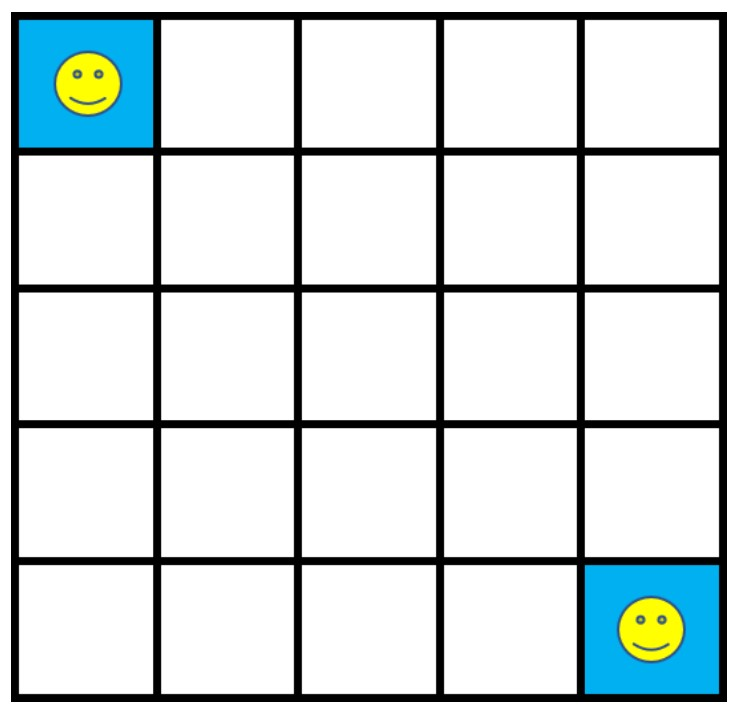

In [1]:
import random

# initialize the grid
coord_to_Qposn = []
qposn = 0

for i in range(5):
  coord_to_Qposn.append([])
  for j in range(5):
    coord_to_Qposn[i].append(qposn)
    qposn += 1
actions = {0: (0,1), 1: (0,-1), 2: (-1,0), 3: (1,0)} # {right, left, up, down}
Qtable_init = []

for ind in range(qposn):
  dist = min(ind, qposn-ind-1)
  if dist==0:
    Qtable_init.append([0,0,0,0])
  else:
    Qtable_init.append([])
    for act in range(len(actions)):
      val = -random.randint(1, dist+3)
      Qtable_init[ind].append(val)

print(coord_to_Qposn)
print(Qtable_init)

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19], [20, 21, 22, 23, 24]]
[[0, 0, 0, 0], [-2, -2, -2, -2], [-4, -4, -4, -3], [-1, -3, -2, -6], [-1, -7, -7, -2], [-2, -4, -1, -1], [-9, -2, -5, -3], [-8, -4, -6, -7], [-3, -4, -8, -4], [-11, -4, -3, -1], [-3, -10, -6, -11], [-6, -11, -8, -6], [-15, -11, -1, -5], [-11, -12, -13, -7], [-8, -8, -12, -2], [-5, -5, -4, -7], [-3, -4, -3, -7], [-2, -5, -2, -5], [-9, -6, -4, -8], [-7, -2, -3, -6], [-1, -1, -1, -6], [-5, -1, -4, -3], [-5, -5, -1, -5], [-1, -4, -2, -1], [0, 0, 0, 0]]


We set a negative reward r = −5 for each transition, a discount factor γ = 0.9, and the probability of an initial state p(s0) equals 1/25 . Our goal is to learn an optimal Q-value function that can guide the agent to reach one of the terminal states (smiling states) in least number of actions from a randomly sampled initial state based on p(s0). The initial Q table can be randomly defined by you.

In [2]:
reward = -5
discount = 0.9
ps0 = 1/25

 ## Q1 [Value iteration algorithm] 
 
 Using the Bellman’s equation, implement the value iteration algorithm to iteratively update the Q-value function (table) until convergence.

In [3]:
import copy

Q1Table = copy.deepcopy(Qtable_init)
print('Initial Qtable:')
for state in Q1Table:
  print(state)
prevQt = [[]]
iter = 0
print('\n Iterations completed:', end=' ')

while(Q1Table!=prevQt):
  iter += 1
  prevQt = copy.deepcopy(Q1Table)
  for state in range(1, qposn-1):
    x, y = state//5, state%5
    for act in actions:
      change = actions[act]
      xi, yj = change
      i, j = x+xi, y+yj
      if i<0:
        i=0
      elif i>4:
        i=4
      if j<0:
        j=0
      elif j>4:
        j=4
      qrow = coord_to_Qposn[i][j]
      Q1Table[state][act] = round(reward + discount*max(prevQt[qrow]), 2)
  print(iter, end=' ')

print('\n')
print('Final Qtable:')
for state in Q1Table:
  print(state)


Initial Qtable:
[0, 0, 0, 0]
[-2, -2, -2, -2]
[-4, -4, -4, -3]
[-1, -3, -2, -6]
[-1, -7, -7, -2]
[-2, -4, -1, -1]
[-9, -2, -5, -3]
[-8, -4, -6, -7]
[-3, -4, -8, -4]
[-11, -4, -3, -1]
[-3, -10, -6, -11]
[-6, -11, -8, -6]
[-15, -11, -1, -5]
[-11, -12, -13, -7]
[-8, -8, -12, -2]
[-5, -5, -4, -7]
[-3, -4, -3, -7]
[-2, -5, -2, -5]
[-9, -6, -4, -8]
[-7, -2, -3, -6]
[-1, -1, -1, -6]
[-5, -1, -4, -3]
[-5, -5, -1, -5]
[-1, -4, -2, -1]
[0, 0, 0, 0]

 Iterations completed: 1 2 3 4 5 6 

Final Qtable:
[0, 0, 0, 0]
[-13.55, -5.0, -9.5, -13.55]
[-17.2, -9.5, -13.55, -17.2]
[-20.48, -13.55, -17.2, -20.48]
[-20.48, -17.2, -20.48, -17.2]
[-13.55, -9.5, -5.0, -13.55]
[-17.2, -9.5, -9.5, -17.2]
[-20.48, -13.55, -13.55, -20.48]
[-17.2, -17.2, -17.2, -17.2]
[-17.2, -20.48, -20.48, -13.55]
[-17.2, -13.55, -9.5, -17.2]
[-20.48, -13.55, -13.55, -20.48]
[-17.2, -17.2, -17.2, -17.2]
[-13.55, -20.48, -20.48, -13.55]
[-13.55, -17.2, -17.2, -9.5]
[-20.48, -17.2, -13.55, -20.48]
[-17.2, -17.2, -17.2, -17.2]
[-13.55

In [4]:
def arrows(qtv):
  i,j = 0,0
  dirn = []
  for st in qtv:
    v = max(st)
    if j==0:
      dirn.append([])
    if v==0:
      dirn[i].append('\U0001f600')
    else:
      actStr = ''
      if st[0]==v:
        actStr += '→'
      if st[1]==v:
        actStr += '←'
      if st[2]==v:
        actStr += '↑'
      if st[3]==v:
        actStr += '↓'
      dirn[i].append(actStr)
    j += 1
    if j>4:
      j = 0
      i += 1
  for d in dirn:
    print('\t'.join(d))


In [5]:
print('Initial Qtable directions:')
arrows(Qtable_init)

Initial Qtable directions:
😀	→←↑↓	↓	→	→
↑↓	←	←	→	↓
→	→↓	↑	↓	↓
↑	→↑	→↑	↑	←
→←↑	←	↑	→↓	😀


In [6]:
print('Final Qtable directions:')
arrows(Q1Table)

Final Qtable directions:
😀	←	←	←	←↓
↑	←↑	←↑	→←↑↓	↓
↑	←↑	→←↑↓	→↓	↓
↑	→←↑↓	→↓	→↓	↓
→↑	→	→	→	😀


## Q2 [ϵ-greedy Q-learning algorithm] 
Use a simple four-layer (i.e. three hidden layers and one output layer)fully-connected deep neural network (called as Q-network) to approximate the Q value function. The three hidden layers contain 32, 8, and 16 neurons respectively and all use the ReLU activation function. The output function is linear. Implement the ϵ-greedy Q-learning algorithm to train the preceding Q-network , where the ϵ-greedy strategy is the exploration strategy introduced in Lecture 5.

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as func
import numpy as np
from tqdm import tqdm

In [8]:
grid = np.array([
    [1,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,1]
])

In [9]:
class HWGame:
  
  def __init__(self, grid):
    self.grid = grid
    self.x, self.y = x, y
    self.numActs = 4
    self.goals = [(0,0), (4,4)]
    self.actions = {
        0: lambda x,y: (x+1,y) if x<self.x-1 else (x,y),
        1: lambda x,y: (x-1,y) if x>0 else (x,y),
        2: lambda x,y: (x,y+1) if y<self.y-1 else (x,y),
        3: lambda x,y: (x,y-1) if y>0 else (x,y)
    }
  
  def action(self, x, y, act):
    if act>self.numActs:
      return None
    return self.actions[act](x,y)
  
  def getInd(self, x, y):
    return x*(self.x*y)
  
  def getAct(self, act):
    if act==0:
      return 'right'
    elif act==1:
      return 'left'
    elif act==2:
      return 'up'
    else:
      return 'down'

In [10]:
actNum = 1

In [11]:
class Learner(nn.Module):

  def __init__(self, numActions) -> None:
    super(Learner, self).__init__()
    self.layers = nn.ModuleList([
        nn.Linear(2, 32),
        nn.ReLU(),
        nn.Linear(32, 8),
        nn.ReLU(),
        nn.Linear(8, 16),
        nn.ReLU(),
        nn.Linear(16, numActions)
    ])
  
  def forward(self, X):
    ycap = X
    for layer in self.layers:
      ycap = layer(ycap)
    return ycap


In [12]:
def getCoords(game):
  x, y = np.random.randint(0, game.x), np.random.randint(0, game.y)
  while (x,y) in game.goals:
    x, y = np.random.randint(0, game.x), np.random.randint(0, game.y)
  return x,y


Let ϵ = 0.9^episode, where episode refers to the episode index. Recall that there is a loop “for episode=1...M do {...}” in the Q-learning algorithm. 

The intuition to consider such a dynamic ϵ is as follows: In the early stage of the algorithm when episode is small, ϵ will be large. In this case, the majority of actions will be randomly selected from the possible actions. This makes sense as the estimated Q-network will have a low quality in the early stage and may not be useful to identify high-quality actions. In the latter stage of the algorithm when episode is large, ϵ be close to zero. In this case, the majority of actions will be selected using the estimated Q-network.

In [13]:
game = HWGame(grid)
numEpisodes = 1000
gamma = discount
r = reward
sequenceLimit = 5
targetUpdate = 8

In [14]:
policyModel = Learner(game.numActs)
targetModel = Learner(game.numActs)
targetModel.eval()
targetModel.load_state_dict(policyModel.state_dict())
criterion = nn.SmoothL1Loss()
optimizer = torch.optim.SGD(policyModel.parameters(), lr=0.01)

In [15]:
for episode in range(numEpisodes):
  
  if episode%10==9:
    print('Episode', episode+1)
  # print('Episode', episode+1)
  s = torch.Tensor([getCoords(game)]).float()
  reached = False
  seq = 0
  
  while(not reached):
    
    q0, act = policyModel(s).max(1)
    xt, yt = game.action(int(s[0][0].cpu()), int(s[0][1].cpu()), int(act.cpu()))
    reached = (xt,yt) in game.goals
    rwrd = torch.Tensor([r]).float()
    expVal = rwrd
    
    if not reached:
      expVal += targetModel(torch.Tensor([[xt,yt]]).float()).max().squeeze() * gamma
    loss = criterion(q0, expVal)
    optimizer.zero_grad()
    loss.backward()
    
    for param in policyModel.parameters():
      param.grad.data.clamp(-1,1)
    optimizer.step()
    reached = (xt,yt) in game.goals

    seq += 1
    if seq >= sequenceLimit:
      xx, yy = getCoords(game)
      s = torch.Tensor([[xx,yy]]).float()
      seq = 0
    else:
      s = torch.Tensor([[xt,yt]]).float()
  
  if (episode+1) % targetUpdate == 0:
    targetModel.load_state_dict(policyModel.state_dict())


Episode 10
Episode 20
Episode 30
Episode 40
Episode 50
Episode 60
Episode 70
Episode 80
Episode 90
Episode 100
Episode 110
Episode 120
Episode 130
Episode 140
Episode 150
Episode 160
Episode 170
Episode 180
Episode 190
Episode 200
Episode 210
Episode 220
Episode 230
Episode 240
Episode 250
Episode 260
Episode 270
Episode 280
Episode 290
Episode 300
Episode 310
Episode 320
Episode 330
Episode 340
Episode 350
Episode 360
Episode 370
Episode 380
Episode 390
Episode 400
Episode 410
Episode 420
Episode 430
Episode 440
Episode 450
Episode 460
Episode 470
Episode 480
Episode 490
Episode 500
Episode 510
Episode 520
Episode 530
Episode 540
Episode 550
Episode 560
Episode 570
Episode 580
Episode 590
Episode 600
Episode 610
Episode 620
Episode 630
Episode 640
Episode 650
Episode 660
Episode 670
Episode 680
Episode 690
Episode 700
Episode 710
Episode 720
Episode 730
Episode 740
Episode 750
Episode 760
Episode 770
Episode 780
Episode 790
Episode 800
Episode 810
Episode 820
Episode 830
Episode 840
E

In [18]:
q2_table = []
with torch.no_grad():
  for yj in range(game.y+2):
    for xi in range(game.x+1):
      op = policyModel(torch.from_numpy(np.array([[xi,yj]])).float()).cpu().numpy()
      q2_table.append(op[0])
      maxPts = np.ndarray.flatten(np.argwhere(op == np.max(op)))
      actstr = ''
      for act in maxPts:
        if act==0:
          actstr+='→'
        if act==1:
          actstr+='←'
        if act==2:
          actstr+='↑'
        if act==3:
          actstr+='↓'
      print(actstr, end='\t')
    print('\n')


→←	→←	→←	→←	→←	

→↓	→↓	→↓	→↓	→←	

→↓	→↓	→↓	→↓	→↓	

→↓	→↓	→↓	→↓	→↓	

→↓	→↓	→↓	→↓	→↓	



In [19]:
print('Final Q-Table:')
for row in q2_table:
    print(row)


Final Q-Table:
[-3.6272538 -3.5452821 -3.8092008 -3.7935977]
[-5.5927167 -4.895316  -5.579006  -5.7323384]
[-10.64594   -9.197254 -10.577193 -10.328908]
[-15.446553 -13.373253 -15.350702 -14.654183]
[-20.319265 -17.677904 -20.21324  -19.010527]
[-6.24918  -7.002464 -6.549749 -5.428342]
[-10.806466  -10.8535    -11.08509    -9.6209345]
[-15.134633 -14.425886 -15.358906 -13.645061]
[-19.480347 -18.002106 -19.658724 -17.699652]
[-24.00622  -21.848328 -24.182423 -21.870415]
[-12.258894 -13.22718  -12.789134 -10.29725 ]
[-16.321455 -16.769571 -16.82663  -13.964833]
[-20.001862 -20.01215  -20.54487  -17.298258]
[-23.851313 -23.296219 -24.39929  -20.838018]
[-28.012959 -26.742924 -28.523592 -24.708492]
[-18.267763  -19.400307  -19.022043  -15.1916895]
[-22.25593  -22.932144 -22.984379 -18.758615]
[-25.7145   -26.061913 -26.48334  -21.850168]
[-29.19616  -29.12965  -30.006517 -25.00677 ]
[-32.908634 -32.37325  -33.748703 -28.382765]
[-24.211079 -25.51334  -25.177298 -20.026838]
[-28.052252 -28

## Q3 [Deep Q-learning with experience replay] 
Extend the implementation of the ϵ-greedy Q-learning algorithm for Q2 to integrate the experience reply strategy. You may set the size of the reply memory to 5,000 transitions.


In [20]:
class ReplayMemory:

  def __init__(self, qty):
    self.qty = qty
    self.mem = []
    self.posn = 0
  
  def push(self, game, x, y, act):
    xt, yt = game.action(x, y, act)
    if self.qty < len(self.mem):
      self.mem[self.posn] = [x, y, act, xt, yt]
      self.posn = (self.posn + 1) % self.qty
    self.mem.append([x, y, act, xt, yt])
  
  def sample(self, sz):
    return np.array(self.mem)[np.random.randint(0,len(self.mem),sz)]


In [21]:
game = HWGame(grid)
replay = ReplayMemory(5000)
device = torch.device('cpu')
batchSize=32
eps=1e-2

In [22]:
policyModel = Learner(game.numActs)
targetModel = Learner(game.numActs)
targetModel.eval()
targetModel.load_state_dict(policyModel.state_dict())
criterion = nn.SmoothL1Loss()
optimizer = torch.optim.SGD(policyModel.parameters(), lr=0.01)

In [23]:
tq = tqdm(range(numEpisodes))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [24]:
for episode in tq:
  x,y = getCoords(game)
  seq = 0
  while (x,y) not in game.goals:
    seq += 1
    s = torch.Tensor([[x, y]]).float()
    with torch.no_grad():
      if np.random.uniform()>eps and seq<sequenceLimit:
        temp, act = policyModel(s).max(1)
        act = int(act.cpu())
      else:
        seq = 0
        act = np.random.randint(game.numActs)
    xt, yt = game.action(x, y, act)
    replay.push(game, x, y, act)
    batch = replay.sample(batchSize)
    states = torch.Tensor(batch[:, 0:2]).float()
    actions = torch.Tensor(batch[:, 2:3]).view(batchSize, 1).type(torch.int64)
    newStates = torch.Tensor(batch[:, 3:5]).float()
    q0 = policyModel(states).gather(1, actions)
    expVal = torch.full((batchSize, ), r, dtype=torch.float64)
    mask = torch.Tensor([(int(newStates[i][0].cpu()), int(newStates[i][1].cpu())) not in game.goals for i in range(batchSize)]).bool()
    expVal[mask] += targetModel(newStates[mask]).max(1)[0] * gamma
    optimizer.zero_grad()
    loss = criterion(q0, expVal.unsqueeze(1))
    loss.backward()
    optimizer.step()
    x, y = xt, yt
  if (episode+1) % targetUpdate == 0:
    targetModel.load_state_dict(policyModel.state_dict())

100%|██████████| 1000/1000 [00:25<00:00, 39.91it/s]


In [29]:
q3_table = []
with torch.no_grad():
  for yj in range(game.y+2):
    for xi in range(game.x+1):
      op = policyModel(torch.from_numpy(np.array([[xi, yj]])).float().to(device)).cpu().numpy()
      op = np.ndarray.flatten(op)
      q3_table.append(op)
      maxPts = np.ndarray.flatten(np.argwhere(op == np.max(op)))
      actstr = ''
      for act in maxPts:
        if act==0:
          actstr+='→'
        if act==1:
          actstr+='←'
        if act==2:
          actstr+='↑'
        if act==3:
          actstr+='↓'
      print(actstr, end='\t')
    print('\n')


←	←	←	←	←	

↓	←	←	↓	↓	

↓	↓	↓	↓	↓	

↓	↓	↓	↓	↓	

↓	↓	↓	↓	↓	



In [30]:
print('Final Q-Table:')
for row in q3_table:
    print(row)


Final Q-Table:
[-5.807716  -3.9965937 -6.179266  -4.4049296]
[ -8.9321575  -5.3890295 -11.262281   -9.910637 ]
[-14.052902 -10.142428 -16.429953 -14.313012]
[-18.188383 -14.080893 -20.494398 -17.73975 ]
[-21.367447 -17.224106 -23.406357 -20.078335]
[-10.4926605  -9.50299    -8.825292   -5.282364 ]
[-12.38266  -10.057552 -12.803039 -10.173257]
[-16.944296  -14.231324  -17.529541  -14.3557415]
[-20.63366  -17.707382 -21.014833 -17.278126]
[-23.881504 -20.795286 -24.03554  -19.786512]
[-15.67835  -14.330891 -13.850675  -9.557053]
[-17.70508  -15.232692 -17.86293  -14.417658]
[-20.448092 -17.6862   -20.774225 -17.148958]
[-22.574217 -20.11004  -22.08327  -17.8856  ]
[-25.608412 -23.275358 -24.426514 -19.559649]
[-21.06818  -19.40305  -19.061123 -14.032203]
[-22.98471  -20.254528 -22.870176 -18.651413]
[-24.177284 -20.98965  -24.849148 -20.986347]
[-26.011618 -23.058384 -26.025734 -21.710682]
[-28.053019 -25.395302 -27.255106 -22.375286]
[-26.053236 -24.08073  -23.893064 -18.18192 ]
[-27.96